# Machine Learning and Risk Modelling

## What is Machine Learning?

To grasp the definition of Machine Learning (ML), it's helpful to narrow the focus by exploring its relationship with Artificial Intelligence (AI) and Deep Learning (DL).


<img src="img/ai_ml_dl3.png" alt="AI, ML & DL" width="700" height="500"/>
<p>Image source: <a href="https://developer.nvidia.com/deep-learning">Nvidia</a></p>

<span style="color: #b0d45c;">**Artificial Intelligence (AI)**</span>:
-  While there is **no strict definition** of Artificial Intelligence, it is commonly referred to as the capability of machines to perform tasks that were previously solvable only by humans or those that are particularly challenging and typically require some form of **"intelligence"**.
- AI traces its origins back to the **1940s**, coinciding with the invention of the computer. Pioneering scientists such as **Alan Turing** and **John von Neumann** posed a fundamental question: If we can formalize computation, can we leverage this computation to formalize the concept of **"thinking"**?
- AI encompasses a wide range of fields, including **machine learning**, **natural language processing**, **computer vision**, **robotics**, **search algorithms**, **game playing**, **intelligent agents**, and much more.

<span style="color: #88bc04;">**Machine Learning (ML)**</span>:
- ML is **mathematically well-defined** and is capable of solving reasonably **narrow** tasks.
- ML algorithms usually construct **predictive/decision models** from typically **labelled data**, instead of explicitly programming them.
- ML roughly divides into **supervised**, **unsupervised** and **reinforcment** learning with a variety of different ML methods that exist to solve the underlying prediction/decision task.
    - supervised learning: training a model on a labelled dataset, where the input data is paired with the correct output. The model learns to make predictions/classifications based on this labeled information.
    - unsupervised learning: the model works with unlabeled data, aiming to identify patterns and relationships within the data without any specific guidance.
    - reinforcement learning: training a model through interactions with an environment, where it learns to make decisions based on the rewards or penalties it receives from its actions.

    In this course we focus on supervised learning applying tree-based regression methods.

<span style="color: #68ac04;">**Deep Learning (DL)**</span>:
- DL is a subfield of ML that focuses on the study of **neural networks**.
- Artificial Neural Networks (ANNs) have been researched for **decades**. DL utilizes **more layers**, incorporates **specialized neurons** designed for **images and tensors**, and benefits from numerous **computational improvements** that facilitate training on **large datasets**.
- DL can be used on rectangular data, but typical applications are images, texts or signals.

In short:
> **Machine Learning is a subfield of Artificial Intelligence consisting of mathematical models that learn from historical data to solve narrow prediction/classification/decision tasks.**

## Application of Machine Learning in Risk Management

Machine Learning (ML) has become an essential tool in **risk management** due to its ability to analyze vast amounts of data and uncover patterns that traditional methods may overlook. In today's complex financial landscape, organizations face numerous risks, and ML provides a robust framework for modeling and steering these risks effectively.




### Why Use Machine Learning?

1. **Enhanced Predictive Accuracy**: ML algorithms can improve the accuracy of risk predictions by learning from historical data and adapting to new information. This is particularly important in areas like credit risk modeling, where understanding borrower behavior is crucial.
1. **Real-Time Analysis**: With the ability to process data in real-time, ML enables organizations to respond swiftly to emerging risks. This agility is vital in dynamic markets where conditions can change rapidly.
1. **Complex Data Handling**: The financial sector generates vast amounts of data, including unstructured data. ML techniques excel at processing and analyzing this complex data, allowing for more comprehensive risk assessments (more on unstructured data in the [second part of the course](day2_nlp.ipynb)).
1. **Model Risk Management**: As organizations increasingly rely on data-driven models, managing the risks associated with these models becomes critical. ML can help identify and mitigate model risk by providing insights into model performance and reliability.
1. **Automation and Efficiency**: By automating routine risk assessment tasks, ML frees up valuable resources, allowing risk managers to focus on strategic decision-making. This efficiency is particularly beneficial in credit risk management, where timely decisions can significantly impact profitability.

In summary, the integration of Machine Learning into risk management not only enhances predictive capabilities but also streamlines processes, making it an invaluable asset for organizations aiming to navigate the complexities of modern financial risks.

### A real-world use case: Residual Value Risk Modelling

In the following, we will work on a real-world use case that car leasing entities typically face. It is the risk associated with the uncertainty of what a leased out car can be remarketed at when the car returns to the leasing entity. This asset risk is commonly known as residual value risk.

<img src="img/rv.png" alt="AI, ML & DL" width="1000" height="500"/>
<p>Image source: <a href="https://diminishedvalueofgeorgia.com/the-top-10-slowest-depreciating-used-cars-in-the-u-s/">Diminished Value of Georgia</a></p>

**Why do leasing companies care about residual values?**

Residual values are crucial for determining the expected worth of an asset at the end of its lease term. Accurate estimates help leasing companies set appropriate lease payments and manage their financial risk. If the actual residual value is lower than anticipated, it can lead to financial losses for the leasing company.

Thus a key objective in residual value risk management is to achieve the greatest possible accuracy in predicting residual value (RV) – what the vehicles are worth at the end of the lease period – to enable optimal pricing of leases and prevent future losses when remarketing the used vehicles.

**What determines the residual value of vehicle?**

Besides the actual condition of the car, proxied by factors such as age, mileage or damage information, changing customer preferences, economic swings, greater transparency in the used-car market, new technologies such as electric cars, or the regulatory uncertainties do all affect the residual value of a car. This makes the prediction of used cars a complicated task.

For the remaining part of the script we will work with a dataset of used cars that were sold in the US market. Besides the actual used car value the dataset contains variables that affects the selling price of the used cars. Such data is commonly used to train models for the prediction of residual values. this use case forms the basis to go through fundamental concepts in supervised ML:
- What kind of "data" do we learn from?
- How can we formalize the goal of learning?
- What is a "prediction model"?
- How can we quantify "predictive performance"?
- What is a "learning algorithm"
- How can we operationalize learning?

## Developing a Machine Learning Model

When building a ML model from scratch, there are some fundamental steps one typically follows to come up with a production ready model:

1. **Understanding the Problem**: Clearly define the problem you are trying to solve. This includes identifying whether it is a classification, regression, or clustering task, as this will guide your choice of algorithms and evaluation metrics. 

1. **Data Collection and Preparation**: Gather relevant data that is representative of the problem domain. This step involves cleaning the data, handling missing values, and transforming features to ensure they are suitable for modelling.

1. **Feature Selection and Engineering**: Identify the most relevant features that contribute to the model's performance. Feature engineering may involve creating new features from existing data to improve the model's predictive power.

1. **Choosing the Right Algorithm**: Select an appropriate ML algorithm based on the nature of the data and the problem. Different algorithms have different strengths and weaknesses, so understanding these can help in making an informed choice.

1. **Model Training and Validation**: Train the model using a portion of the data while keeping another portion for validation. This helps in assessing how well the model generalizes to unseen data.

1. **Model Evaluation**: Use appropriate metrics to evaluate the model's performance. This could include accuracy, precision, recall, F1 score, or area under the ROC curve, depending on the specific task.

1. **Calibration and Tuning**: Fine-tune the model parameters to optimize performance. This may involve techniques like cross-validation and hyperparameter tuning to ensure the model is well-calibrated.

1. **Deployment and Monitoring**: Once the model is trained and validated, deploy it in a real-world environment. Continuous monitoring is essential to ensure the model maintains its performance over time and adapts to any changes in the data.

### Undestanding the Problem

Based on the information above we know that the development of a residual value risk model is a regression task. Moreover, I have provided, albeit limited, domain knowledge as to what residual value risk is and why lease companies try to steer it. According to my experience, domain knowledge is at least as important as the mathematical and technical skills required to come up with a decent ML model. Thus, try to get input from domain experts if you are tasked to solve an analytical problem in a domain where you only have limited knowledge. It will make your model better!

### Data Cleaning

First, we import `pandas` a popular Python library to manipulate rectangular data.

In [62]:
import pandas as pd

Then we read the used car data.

In [63]:
df_uc = pd.read_csv('data/used_car.csv')

Next we have a first glimpse at the data and check the data types.

In [64]:
df_uc.sample(3)

,sales_id,name,year,selling_price,km_driven,region,state_or_province,city,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,gdp_growth,gscpi
7042,7241,Maruti,2019,780000,7200,South,Tennessee,Kingsport,Petrol,Individual,Manual,First_Owner,21.1,998,100.50,150Nm@ 1700-4500rpm,5,N,0.032965,-0.037451
4457,4592,Maruti,2012,240000,90000,Central,Missouri,Wentzville,Diesel,Individual,Manual,Second_Owner,23.2,1248,73.94,190Nm@ 2000rpm,5,N,0.015401,-0.258197
487,502,Maruti,2017,268000,25000,West,California,Los Angeles,Petrol,Individual,Manual,First_Owner,24.7,796,47.30,69Nm@ 3500rpm,5,Y,0.029502,0.303090


A short description of each variable can be found [here](data/used_car_dictionary.md).

In [66]:
df_uc.dtypes

sales_id               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
region                object
state_or_province     object
city                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
gdp_growth           float64
gscpi                float64
dtype: object

Note the following definiton of data types:
- `int64`: 64-bit signed integer type.
- `float64`: 64-bit floating point type.
- `object`: generic container for any Python object.

Integer and Float data types seem to be correct. However, pandas has read strings as generic objects. We want to be more precise and convert object data types to strings. We can do so with the `convert_dtypes()` method in pandas.

In [71]:
df_uc = df_uc.convert_dtypes(convert_string=True)

In [72]:
df_uc.dtypes

sales_id                      Int64
name                 string[python]
year                          Int64
selling_price                 Int64
km_driven                     Int64
region               string[python]
state_or_province    string[python]
city                 string[python]
fuel                 string[python]
seller_type          string[python]
transmission         string[python]
owner                string[python]
mileage                     Float64
engine                        Int64
max_power                   Float64
torque               string[python]
seats                         Int64
sold                 string[python]
gdp_growth                  Float64
gscpi                       Float64
dtype: object

In [ ]:
from util import plot_univariate

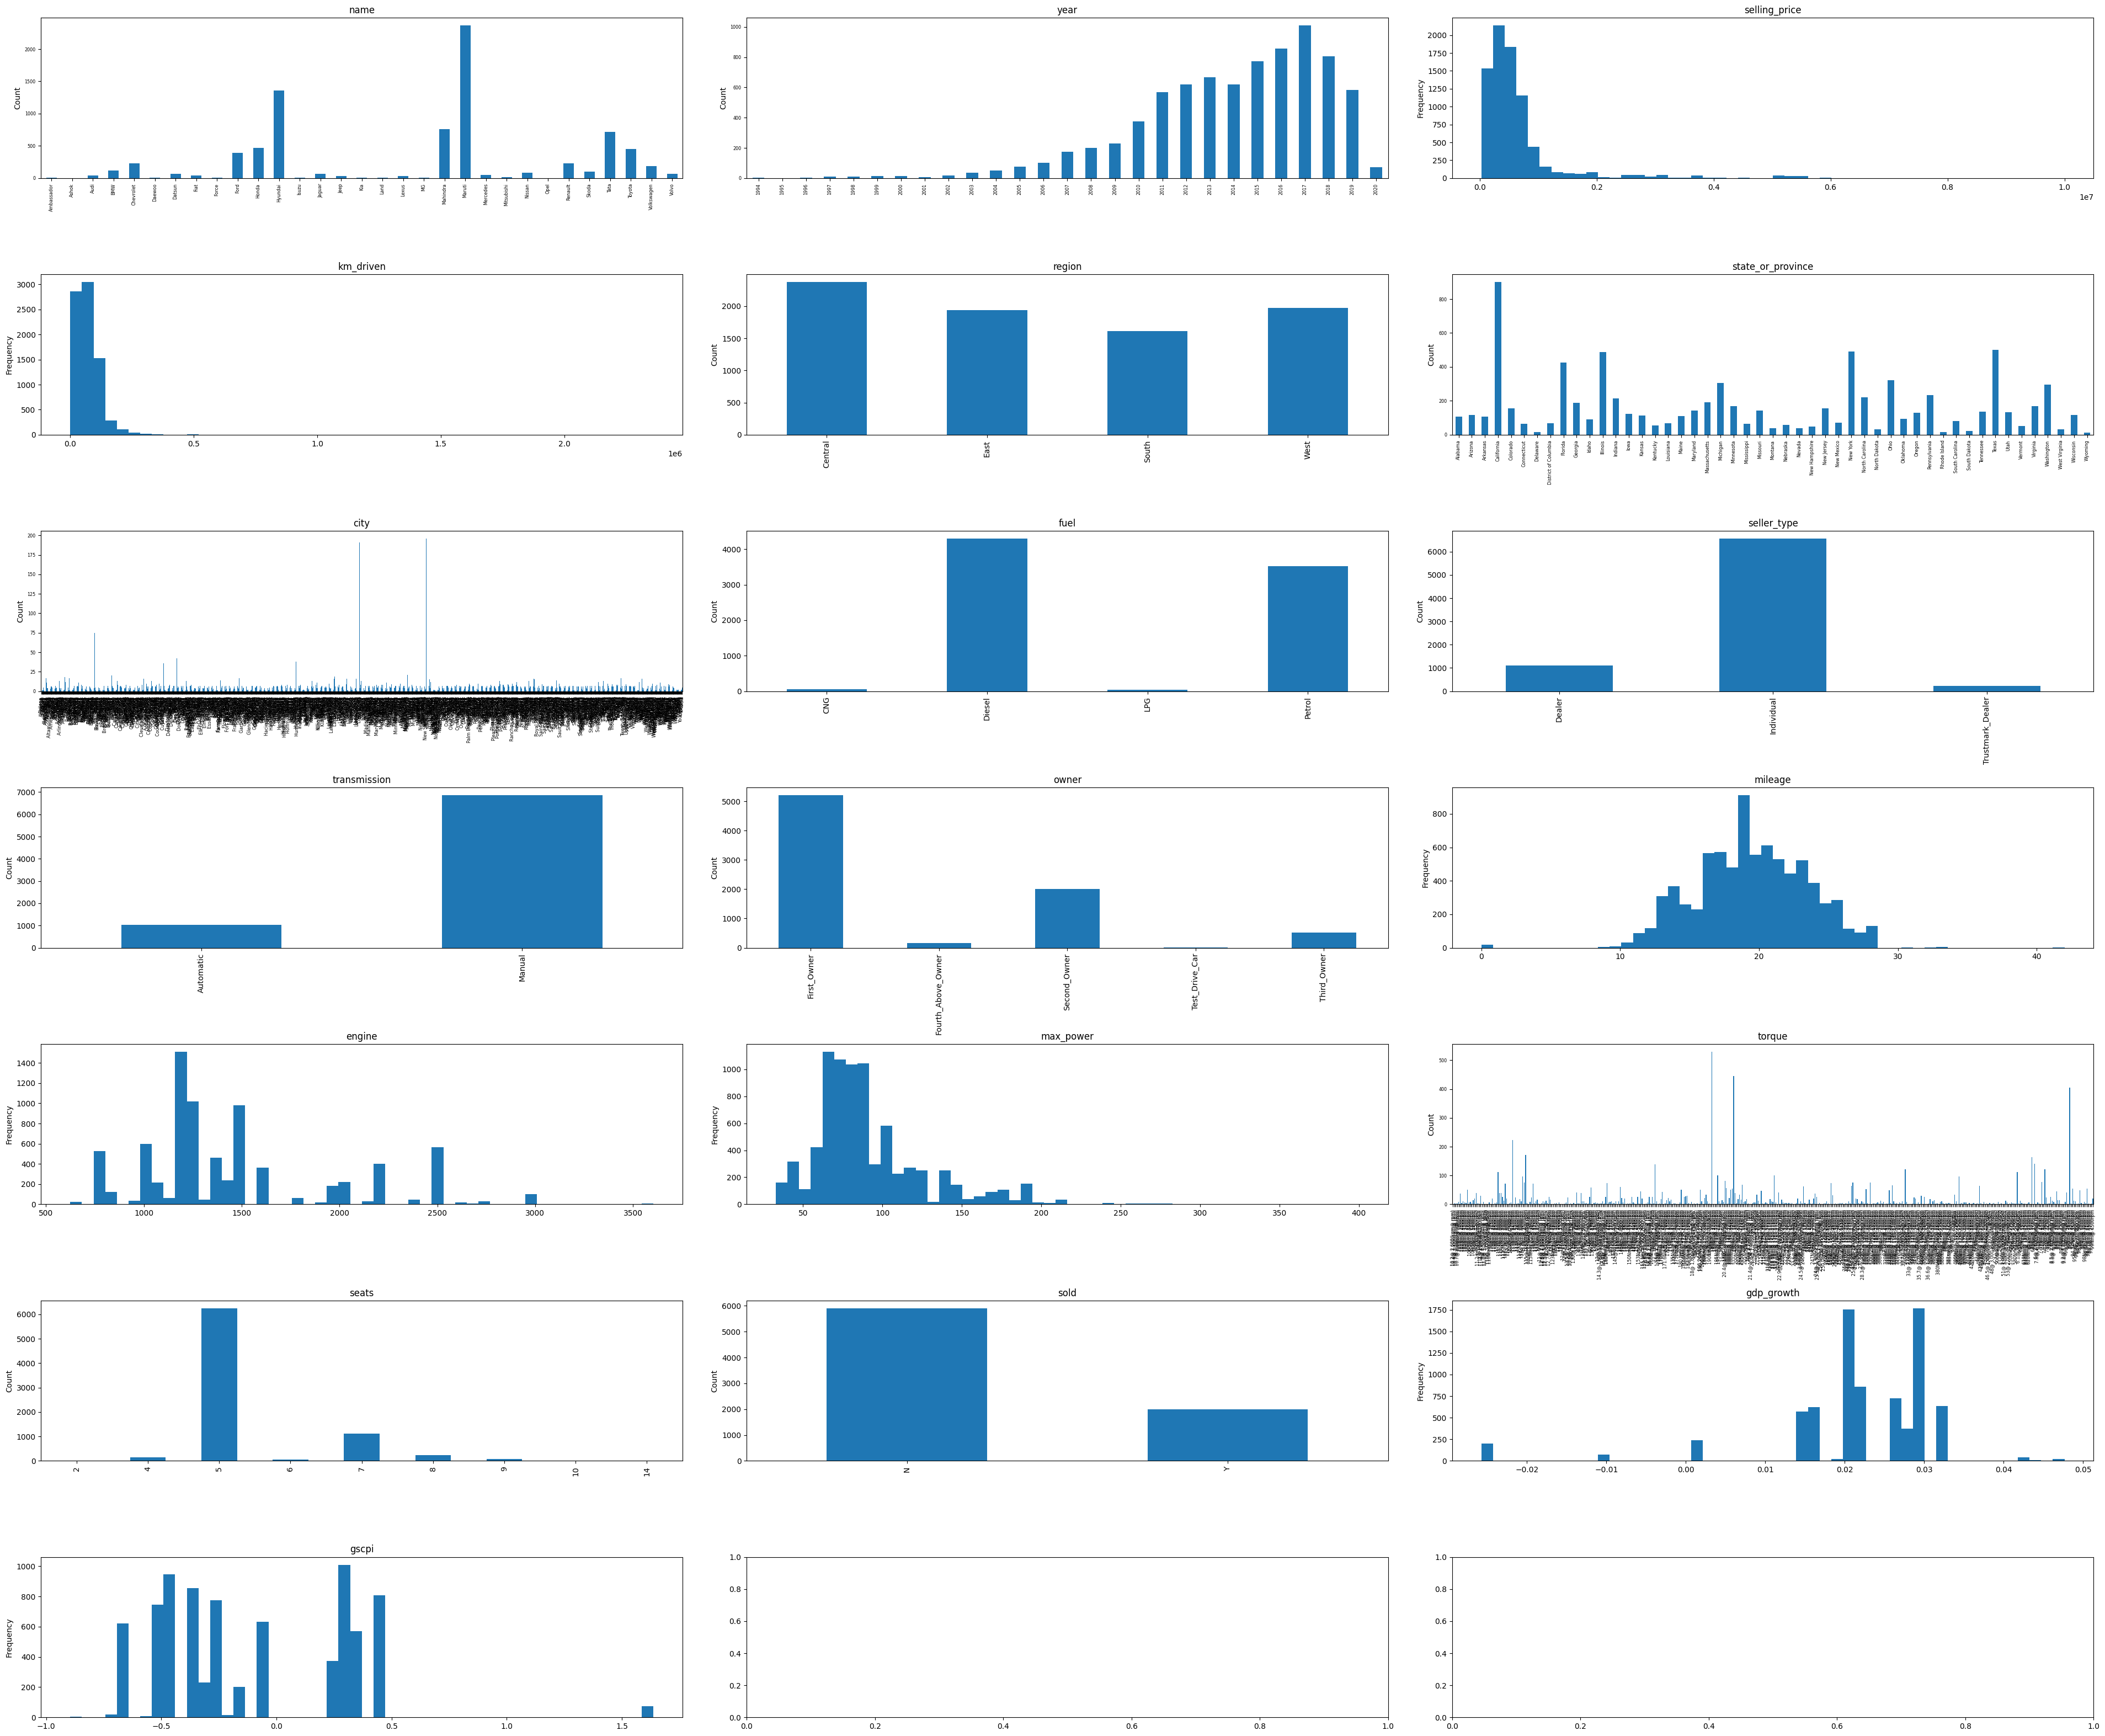

In [101]:
plot_univariate(df_uc, columns=df_uc.drop(columns=['sales_id']).columns, size=(48, 40), hspace=0.6, wspace=0.1)

### Feature Engineering

### Model Training

### Model Evaluation

### Model Fine Tuning

### Model Deployment

In [1]:
import pandas as pd

In [20]:
df_uc = pd.read_csv('data/used_car.csv')
df_gdp = pd.read_csv('data/gdp.csv')

In [23]:
df_uc = df_uc.merge(df_gdp, how='left', left_on='year', right_on='year')